## <center>Elements Of Data Science - F2021</center>
# <center>Week 6: Intro to Machine Learning Models Continued<center>
### <center>10/18/2021</center>

# TODOs

- Readings:
 - PDSH 05.03 [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
 - Recommended: https://scikit-learn.org/stable/model_selection.html
 - Recommended: PML Chapter 6 (Except for Pipelines)
 - Reference: https://scikit-learn.org/stable/supervised_learning.html
 - Reference: PML Chapter Chap 3 and 7
- Quiz 6, Due Sun Oct 24th, 11:59pm
- HW2 out end of the week
- **Midterm**
  - Online via gradescope, open-book, open-note, open-python
  - Released Monday Oct 25th 11:59pm
  - Due Wednesday Oct 27th 11:59pm
  - Have 24hrs after starting exam to finish
  - 30-40 questions (fill in the blank/multiple choice/short answer)
  - Questions asked/answered **privately** via Ed


# Today

- Review Linear Models
- One Vs. Rest For Multiclass/Multilabel Classification
- Distance Based: kNN
- Tree Based: Decision Tree
- Ensembles: Bagging, Boosting, Stacking
- Model Review

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LinearRegression

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
def my_plot_decision_regions(X,y,model,figsize=(8,8)):
    '''Plot classifier decision regions, classification predictions and training data'''
    fig,ax = plt.subplots(1,1,figsize=figsize)
    # use mlxtend plot_decision_regions
    plot_decision_regions(X.values,y.values,model)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);
    
def my_plot_regression(X,y,model,label='yhat',figsize=(8,8)):
    '''Plot regression predictions and training data'''
    # generate test data and make predictions
    X_test = np.linspace(X.iloc[:,0].min(),X.iloc[:,0].max(),1000).reshape(-1,1)
    y_hat = model.predict(X_test)
    # plot
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_test, y_hat, color="cornflowerblue", label=label, linewidth=2)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(y.name); ax.legend();

# Linear Models

- Simple/Multiple Linear Regression
- Logistic Regression
- SVM
- Perceptron, Multi-Layer Perceptron

# Wine as Multi-Class Classification

In [3]:
df_wine = pd.read_csv('../data/wine_dataset.csv',usecols=['alcohol','ash','proline','hue','class'])

X = df_wine[['proline','hue']]
y_c = df_wine['class']

zscore = lambda x: (x-x.mean()) / x.std()

X_zscore = X.apply(zscore,axis=0)
alcohol_zscore = zscore(df_wine.alcohol)

y_c.value_counts().sort_index()

0    59
1    71
2    48
Name: class, dtype: int64

# One Vs. Rest (OvR) Classification For Multiclass, Multilabel

- Can use any binary classifier for Multiclass/Multilabel classification by training multiple models:

 - model 1 : class 1 vs (class 2 and class 3)
 - model 2 : class 2 vs (class 1 and class 3)
 - model 3 : class 3 vs (class 1 and class 2)
<br>
<br>

- For Multiclass
 - Predict $\hat{y}$ using the model with highest $P(y=\hat{y}\mid x)$, or distance from boundary, or ...
<br>
<br>

- For Multilabel
 - Predict $\hat{y}$ for any model that predicts a value above some threshold
<br>
<br>
 
See [sklearn](https://scikit-learn.org/stable/modules/multiclass.html) for more info and other methods

# OvR For Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class='ovr', # default
                          max_iter=1000)     # to avoid timeout errors
logr.fit(X_zscore,y_c)
y_hats = logr.predict(X_zscore.iloc[[15,82,166]]) # generate 3 predictions
y_prob = logr.predict_proba(X_zscore.iloc[[15,82,166]])

for y_hat,p in zip(y_hats,y_prob):
    print(y_hat,p.round(3))

0 [0.967 0.031 0.001]
1 [0.146 0.853 0.001]
2 [0.176 0.344 0.48 ]


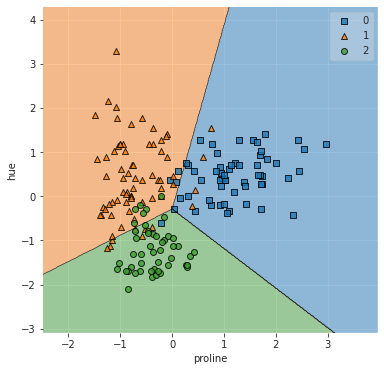

In [5]:
my_plot_decision_regions(X_zscore,y_c,logr,figsize=(6,6))

# Distance Based: k-Nearest Neighbor (kNN)
<br>
- What category do most of the $k$ nearest neighbors belong to?
<br>
<br>
<br>
<div align="center"><img src="images/knn_classifier.png" width="600px"></div>

From PML

# KNN in sklearn

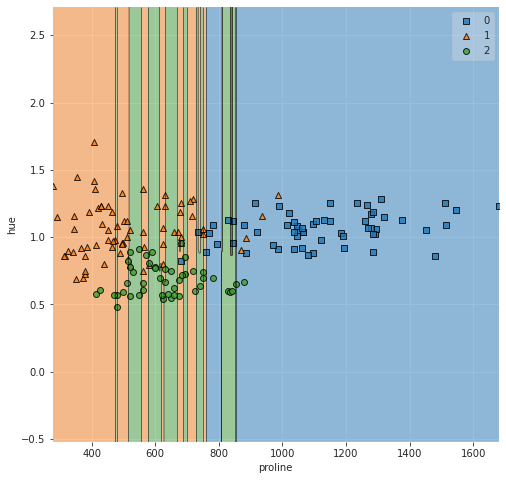

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y_c)

my_plot_decision_regions(X,y_c,knn)

# Effects of Standardization on Distance Based Methods

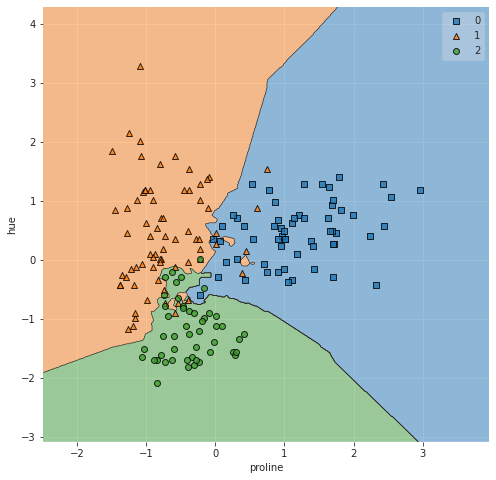

In [7]:
knn_z = KNeighborsClassifier(n_neighbors=3)
knn_z.fit(X_zscore,y_c)

my_plot_decision_regions(X_zscore,y_c,knn_z)

# Curse of Dimensionality

The more dimensions, the less likely points are "close" to each other.

In [8]:
# From Data Science From Scratch by Joel Grus

def random_distances(dim,num_pairs=10_000):
    return np.sqrt(np.square(np.random.rand(num_pairs,dim) - np.random.rand(num_pairs,dim)).sum(axis=1))

# calculate average and minimum distance for 1 to 100 dimensions
dimensions = range(1,100)
avg_distances = []
min_distances = []
min_avg_ratio = []
np.random.seed(0)
for d in dimensions:
    distances = random_distances(d)
    avg_distances.append(distances.mean())
    min_distances.append(distances.min())
    min_avg_ratio.append(distances.min() / distances.mean())

# Curse of Dimensionality Cont.


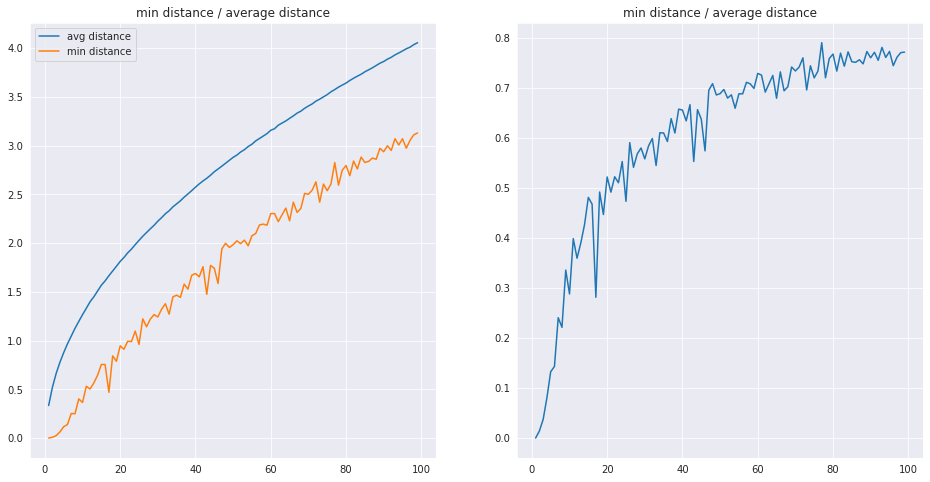

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(dimensions,avg_distances,label='avg distance');
ax[0].plot(dimensions,min_distances,label='min distance');
ax[0].legend()
ax[0].set_title('min distance / average distance');
ax[1].plot(dimensions,min_avg_ratio)
ax[1].set_title('min distance / average distance');

# Regression with kNN

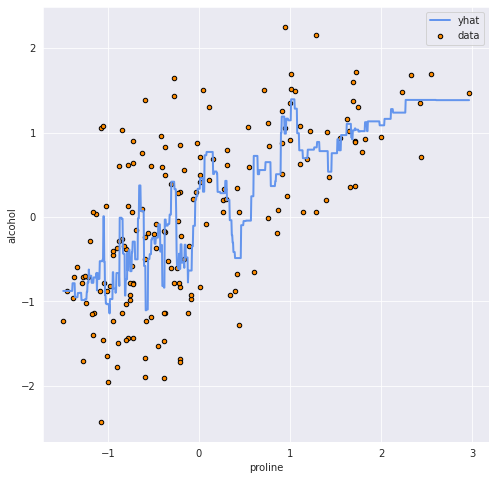

In [10]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_zscore[['proline']],alcohol_zscore)

my_plot_regression(X_zscore[['proline']],alcohol_zscore,knnr)

In [11]:
print(X_zscore.iloc[:5].proline)
knnr.predict(X_zscore.iloc[:5].proline.values.reshape(-1,1))

0    1.010159
1    0.962526
2    1.391224
3    2.328007
4   -0.037767
Name: proline, dtype: float64


array([1.39362532, 1.16451234, 0.78019379, 1.38623458, 0.20864312])

# Decision Tree

- What answer does a series of yes/no questions lead us to?
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="600px"></div>

From PML

# Decision Tree Classifier in sklearn

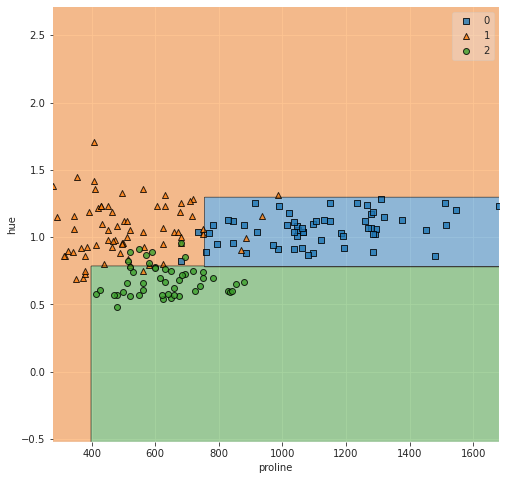

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc_md3 = DecisionTreeClassifier(max_depth=3) # max_depth: max number of questions
dtc_md3.fit(X,y_c)

my_plot_decision_regions(X,y_c,dtc_md3)

# Building a Decision Tree
<br>

- How to decide which question to choose? **Reduce Impurity**

<div align="center"><img src="images/decisiontree_impurity.png"></div>

From PML

In [13]:
df = pd.DataFrame([[0,.2,0],[0,.7,0],[1,.7,1]],columns=['feature1','feature2','target'])
display(df)

# Is feature1 equal to 0?
print(df[df.feature1 == 0].target.values)
print(df[df.feature1 != 0].target.values)
print()

# Is feature2 <= .2?
print(df[df.feature2 <= .2].target.values)
print(df[df.feature2 >  .2].target.values)

,feature1,feature2,target
0,0,0.2,0
1,0,0.7,0
2,1,0.7,1


[0 0]
[1]

[0]
[0 1]


# Plot Learned Decision Tree Using sklearn

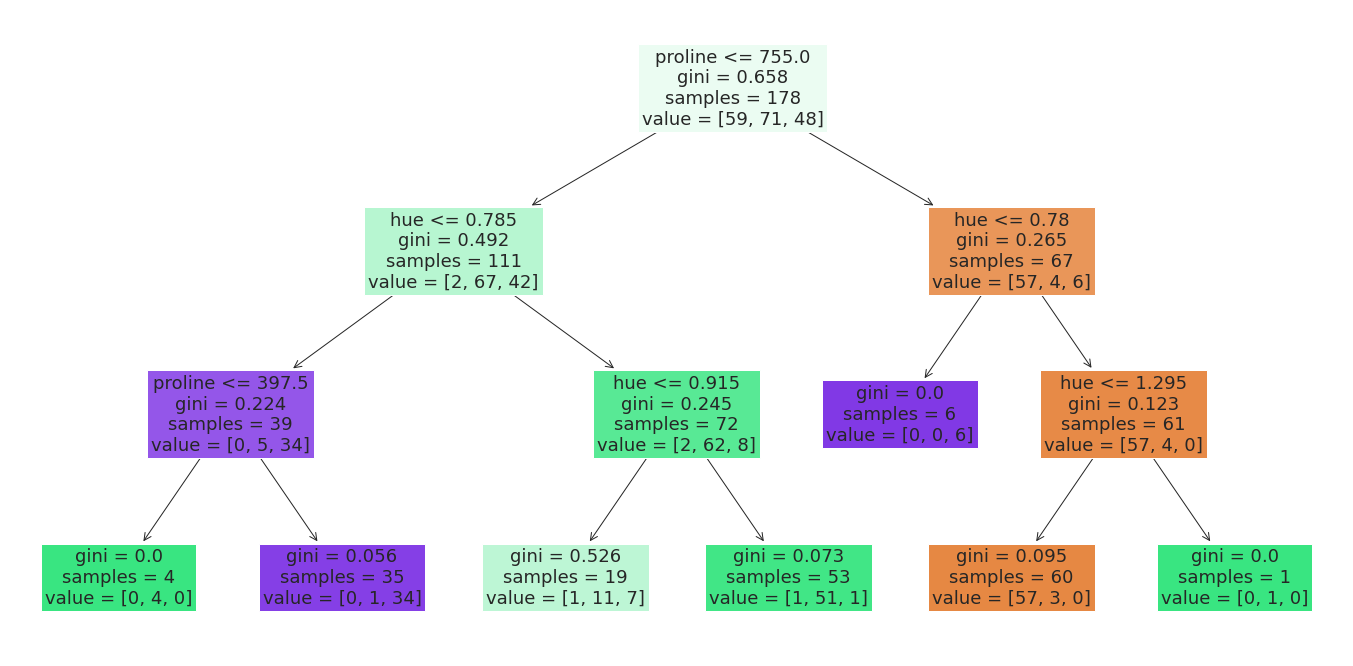

In [14]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(1,1,figsize=(24,12))
plot_tree(dtc_md3,ax=ax,fontsize=18,feature_names=X.columns,filled=True);

# Decision Tree: Increase Maximum Depth

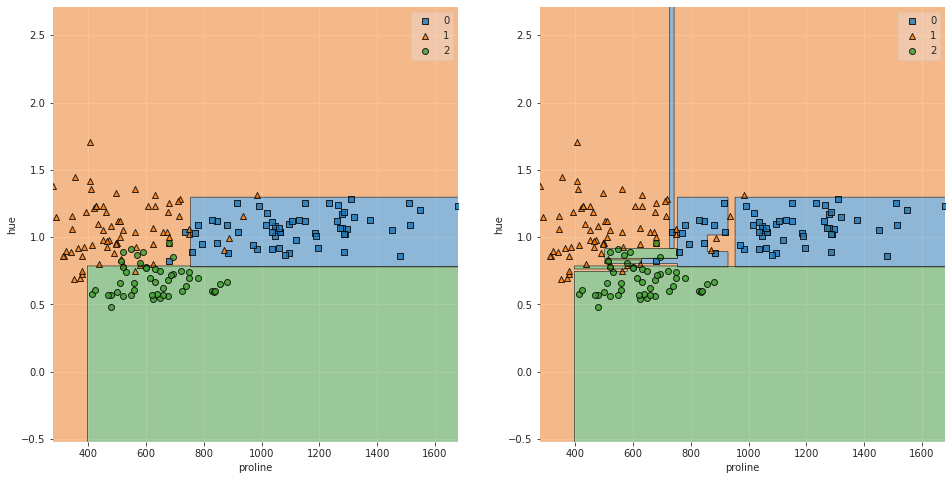

In [15]:
dtc_md10 = DecisionTreeClassifier(max_depth=10)
dtc_md10.fit(X,y_c)

fig,ax = plt.subplots(1,2,figsize=(16,8))
plot_decision_regions(X.values, y_c.values, clf=dtc_md3, ax=ax[0]);
ax[0].set_xlabel(X.columns[0]); ax[0].set_ylabel(X.columns[1]);

plot_decision_regions(X.values, y_c.values, clf=dtc_md10, ax=ax[1]);
ax[1].set_xlabel(X.columns[0]); ax[1].set_ylabel(X.columns[1]);

# Plot Learned Decision Tree Using sklearn
<br>
- For tree with max_depth=10

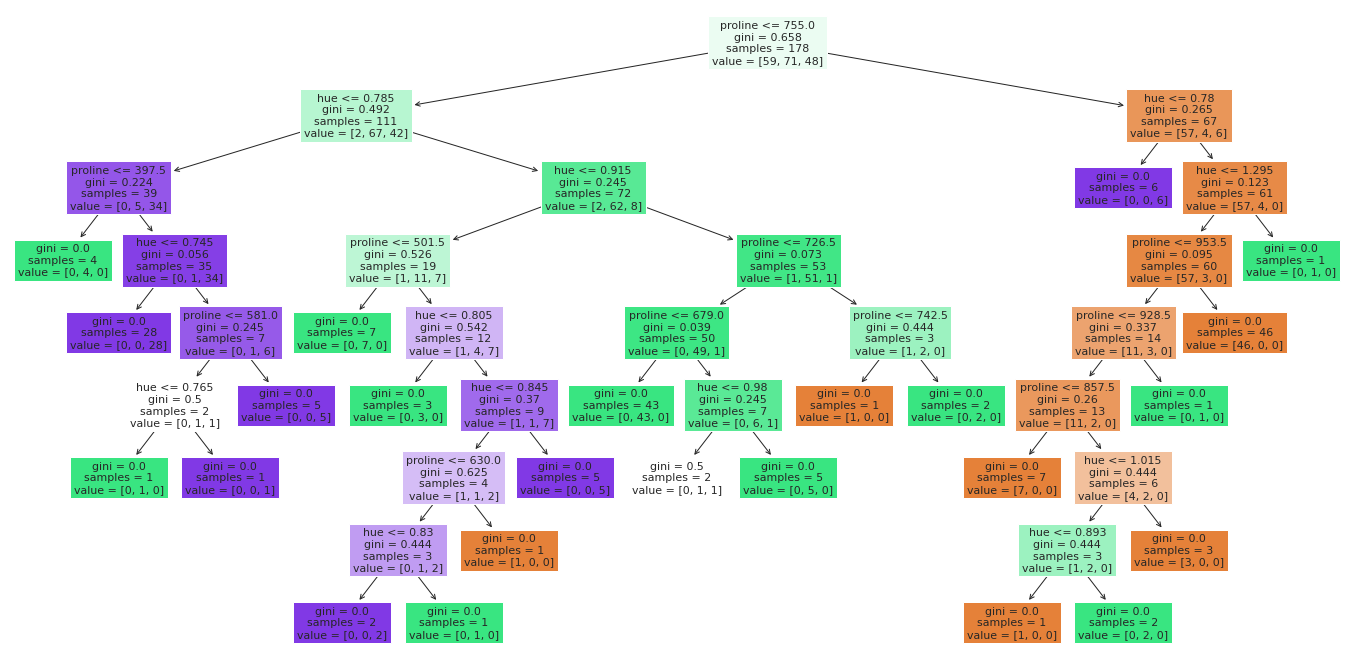

In [16]:
fig,ax = plt.subplots(1,1,figsize=(24,12))
plot_tree(dtc_md10,ax=ax,fontsize=11,feature_names=X.columns,filled=True);

# Regression with Decision Trees

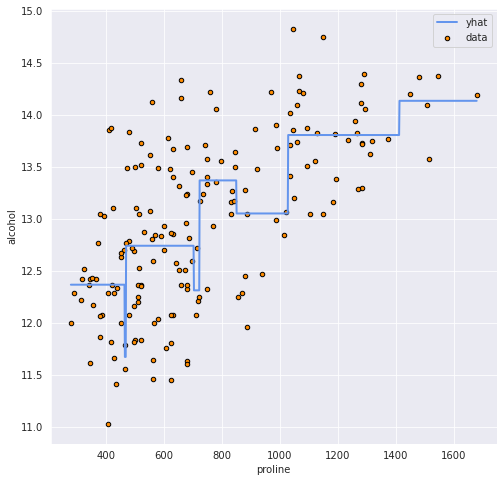

In [17]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X[['proline']],df_wine.alcohol)

my_plot_regression(X[['proline']],df_wine.alcohol,dtr)

# Ensemble Methods
<br>

- "Wisdom of the crowd"
- Can often achieve better performance with collection of learners
- Often use shallow trees as base learners

Common methods for generating ensembles:
<br>

- **Bagging** (Bootstrap Aggregation)
 - Random Forest
- **Boosting**
 - Gradient Boosting
- **Stacking**

# Random Forest and Gradient Boosted Trees
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="1000px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Bagging with Random Forests
<br>

- Trees built with bootstrap samples and subsets of features
- Achieve variation with random selection of observations and features
<br>
<br>

<div align="center"><img src="images/bagging.png" width="700px"></div>

From PML

# Random Forests with sklearn

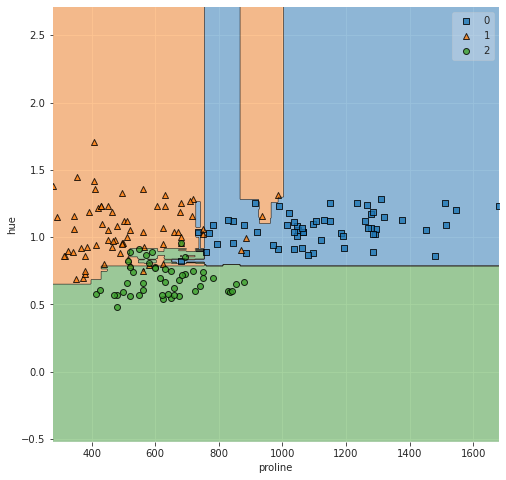

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, # number of trees in ensemble
                             n_jobs=-1,       # parallelize using all available cores
                             random_state=0   # for demonstration only
                            )
rfc.fit(X,y_c)

my_plot_decision_regions(X,y_c,rfc)

# Regression with RandomForests

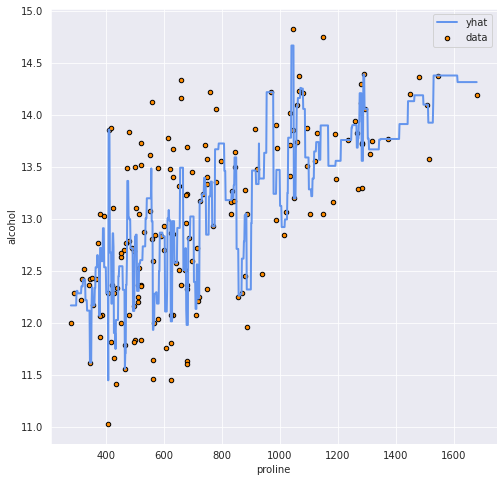

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=3, n_jobs=-1)
rfr.fit(df_wine[['proline']],df_wine.alcohol)

my_plot_regression(df_wine[['proline']],df_wine.alcohol,rfr)

# Gradient Boosted Trees
<br>

- Trees built by adding weight to mis-classification
- Achieve variation due to changes in weights on observations
<br>

<div align="center"><img src="images/boosting.png" width="600px"></div>

From PML

# Gradient Boosted Trees in sklearn

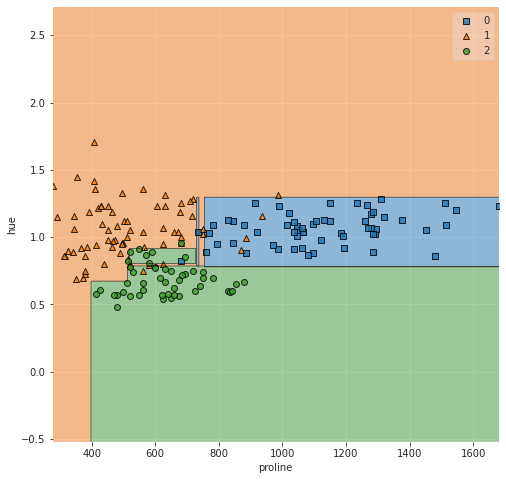

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X,y_c)

my_plot_decision_regions(X,y_c,gbc)

# Regression with Gradient Boosted Trees

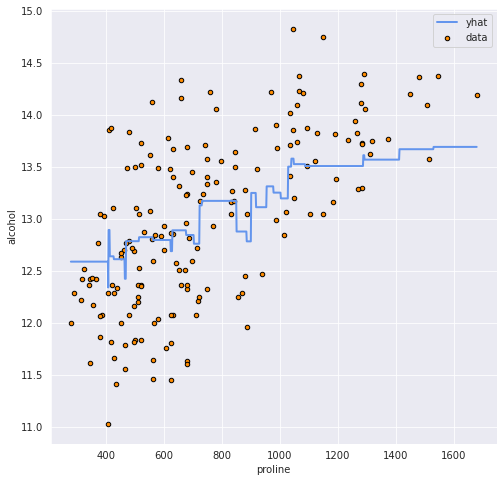

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10)
gbr.fit(df_wine.proline.values.reshape(-1,1),df_wine.alcohol)

my_plot_regression(df_wine[['proline']],df_wine.alcohol,gbr)

# Stacking
<br>

<div align="center"><img src="images/modelstacking.png" width="900px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

# Stacking for Classification

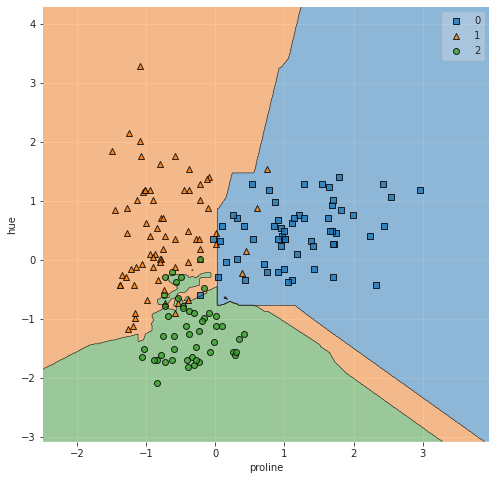

In [22]:
from sklearn.ensemble import StackingClassifier

ensemble = [('lr',LogisticRegression(max_iter=1000)),
            ('dt',DecisionTreeClassifier(max_depth=3)),
            ('knn',KNeighborsClassifier(n_neighbors=3))]

stackc = StackingClassifier(estimators=ensemble,
                         final_estimator=LogisticRegression())
stackc.fit(X_zscore,y_c)

my_plot_decision_regions(X_zscore,y_c,stackc)

# Stacking for Regression

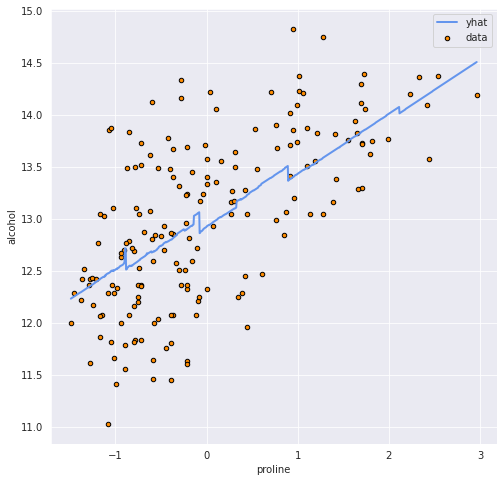

In [23]:
from sklearn.ensemble import StackingRegressor

ensemble = [('lr',LinearRegression()),
            ('dt',DecisionTreeRegressor(max_depth=3)),
            ('knn',KNeighborsRegressor(n_neighbors=6))]

stackr = StackingRegressor(estimators=ensemble,
                           final_estimator=LinearRegression())
stackr.fit(X_zscore[['proline']],df_wine.alcohol)

my_plot_regression(X_zscore[['proline']],df_wine.alcohol,stackr)

<br>
<br>

# <center>Review of Models</center>
<br>
<br>

# Model Review: Simple/Multiple Linear Regression

- Use for: Regression
- Pros:
 - fast to train
 - interpretable coefficients
- Cons:
 - assumes linear relationship
 - depends on removing colinear features
 <br>
 <br>
 
 
<div align="center"><img src="images/simple_linear_regression.png" width="400px"></div>

from PML

# Model Review: Logistic Regression
    
- Use for: Classification
- Pros:
 - fast to train
 - interpretable coefficients (log odds)
- Cons:
 - assumes linear boundary
 - depends on removing colinear features
<br>
<br>
 
<div align="center"><img src="images/logistic_regression.png" width="400px"></div>

from PML

# Model Review: Support Vector Machine (SVM)

- Use for: Classification and Regression

- Pros:
 - fast to evaluate
 - can use kernel trick to learn non-linear functions
- Cons:
 - slow to train
 - can fail to converge on very large datasets
<br>
<br>

<div align="center"><img src="images/which_hyperplane.png" width="400px"></div>

 

# Model Review: Multi-Layer Perceptron

- Use for Classification or Regression
- Pros:
 - non-linear boundary
- Cons:
 - non-convex loss function (sensitive to initial weights)
 - sensitive to feature scaling
 - no GPU support in sklearn: use tensorflow or pytorch



<div align="center"><img src="images/multilayerperceptron_network.png" width="300px"></div>

From https://scikit-learn.org/stable/_images/multilayerperceptron_network.png

# Model Review: k Nearest Neighbor (kNN)
    
- Use for: Classification or Regression
- Pros:
 - fast to train
 - non-linear boundary
- Cons:
 - potentially slow to predict
 - curse of dimensionality
<br>
<br>

<div align="center"><img src="images/knn_classifier.png" width="400px"></div>

From PML

# Model Review: Decision Tree

- Use for: Classification or Regression
- Pros:
 - very interpretable
 - quick to predict
 - can handle numeric and categorical variables without transformation
- Cons:
 - tendency to overfit (learn training set too well, more next class!)
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="400px"></div>

From PML

# Model Review: Random Forest (Ensemble via Bagging)

- Use for: Classification or Regression
- Pros:
 - less likely to overfit than decision tree
 - quick to train (through parallelization, quick to predict
- Cons:
 - less interpretible, though still possible
<br>
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="400px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Model Review: Gradient Boosted Trees (Ensemble via Boosting)

- Use for: Classification or Regression

- Pros:
 - pays more attention to difficult decision regions
 - quick to predict
 - tends to work well on difficult tasks
- Cons:
 - slow to train (parallelization not possible)
 - less interpretible, though still possible
<br>
<br>

<div align="center"><img src="images/boosting.png" width="200px"></div>

From PML

# Model Review: Ensemble via Stacking
    
- Use for: Classification (or Regression)

- Pros:
 - combines benefits of multiple learning types
 - easy to implement
 - tends to win competitions
- Cons:
 - difficult to interpret
 - training/prediction time depends on component models
<br>
<br>

<div align="center"><img src="images/modelstacking.png" width="200px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

# Neural Networks (aka Deep Learning)
<br>

- Pros and Cons of Deep Learning
 - sensitive to initialization and structure
 - high complexity -> needs more data
 - low interpretability
 - can learn complex interactions
 - performs well on tasks involving complex signals (ex images, sound, etc)
<br>
 
<div align="center"><img src="images/deep_neural_net.png" width="700px"></div>

<br>
<br>

# <center>Questions?</center>
<br>
<br>